In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
recent = pd.read_csv("data_94_21.csv")
past = pd.read_csv("data_80_94.csv")

In [4]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
recent['Total_Sales'] = recent[sales].sum(axis=1)

In [5]:
recent[['Year', 'Platform', 'Name','Publisher', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).iloc[:20]

,Year,Platform,Name,Publisher,NA_Sales
5883,2006,Wii,Wii Sports,Nintendo,41490000
8658,2008,Wii,Mario Kart Wii,Nintendo,15850000
10251,2009,Wii,Wii Sports Resort,Nintendo,15750000
11818,2010,X360,Kinect Adventures!,Microsoft Game Studios,14970000
9380,2009,Wii,New Super Mario Bros. Wii,Nintendo,14590000
5726,2006,Wii,Wii Play,Nintendo,14030000
6211,2006,DS,New Super Mario Bros.,Nintendo,11380000
424,1996,GB,Pokemon Red/Pokemon Blue,Nintendo,11270000
5186,2005,DS,Mario Kart DS,Nintendo,9810000
11005,2010,X360,Call of Duty: Black Ops,Activision,9670000


# 차기작 기획을 위한 데이터 분석

지역별, 시기별로 선호장르, 출고량 점유율 등을 통해 가장 인기가 있을 것 같은 장르와 주목해야할 지역을 선정한다.

# 지역별 선호 장르 변화

In [6]:
recent.drop(recent[recent['Genre'] == 'Misc'].index, inplace=True)

In [7]:
part1 = (recent['Year'] >= 1994) & (recent['Year'] < 2005)
part2 = (recent['Year'] >= 2005) & (recent['Year'] < 2011)
part3 = (recent['Year'] >= 2011) & (recent['Year'] < 2017)

In [18]:
recent[part3]['Platform'].value_counts()

PS3     652
3DS     443
X360    441
PSV     378
PC      361
PS4     316
PSP     285
XOne    197
DS      145
Wii     133
WiiU    122
PS2       7
Name: Platform, dtype: int64

In [24]:
tmp = recent[part3].groupby("Publisher")[['NA_Sales', "EU_Sales", 'JP_Sales', 'Other_Sales']].sum()
tmp['total'] = tmp.sum(axis=1)
tmp.sort_values(by='total', ascending=False).head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Publisher,,,,,
Electronic Arts,114299999,118740002,3400000,37349999,273790000
Activision,114080000,77759999,3410000,26710000,221959999
Nintendo,75759999,54849999,61750000,12900000,205259998
Take-Two Interactive,62740009,44789999,2280000,17119999,126930007
Ubisoft,51130000,56480000,2240000,16940000,126790000
Warner Bros. Interactive Entertainment,46910000,36790000,970000,12100000,96770000
Sony Computer Entertainment,33330000,26640000,4150000,11230000,75350000
Namco Bandai Games,17630000,16160000,32790000,5260000,71840000
Square Enix,17710000,18710000,15690000,6250000,58360000


In [33]:
NA = pd.DataFrame({#"NA_Genre_Part1": recent[part1].sort_values(by="NA_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              #"NA_Genre_Part2": recent[part2].sort_values(by="NA_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              "NA_Genre_Part3": recent[part3].sort_values(by="NA_Sales", ascending=False).iloc[:10].reset_index()['Genre']
             }).head()

In [34]:
EU = pd.DataFrame({#"EU_Genre_Part1": recent[part1].sort_values(by="EU_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              #"EU_Genre_Part2": recent[part2].sort_values(by="EU_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              "EU_Genre_Part3": recent[part3].sort_values(by="EU_Sales", ascending=False).iloc[:10].reset_index()['Genre']
             }).head()

In [35]:
Other = pd.DataFrame({#"Other_Genre_Part1": recent[part1].sort_values(by="Other_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              #"Other_Genre_Part2": recent[part2].sort_values(by="Other_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              "Other_Genre_Part3": recent[part3].sort_values(by="Other_Sales", ascending=False).iloc[:10].reset_index()['Genre']
             }).head()

In [36]:
JP = pd.DataFrame({"JP_Genre_Part1": recent[part1].sort_values(by="JP_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              "JP_Genre_Part2": recent[part2].sort_values(by="JP_Sales", ascending=False).iloc[:10].reset_index()['Genre'], 
              "JP_Genre_Part3": recent[part3].sort_values(by="JP_Sales", ascending=False).iloc[:10].reset_index()['Genre']
             }).head()

In [37]:
pd.concat([NA, EU, Other, JP], axis=1)

,NA_Genre_Part3,EU_Genre_Part3,Other_Genre_Part3,JP_Genre_Part1,JP_Genre_Part2,JP_Genre_Part3
0,Shooter,Action,Action,Role-Playing,Platform,Simulation
1,Shooter,Sports,Shooter,Role-Playing,Role-Playing,Role-Playing
2,Action,Shooter,Shooter,Role-Playing,Simulation,Role-Playing
3,Shooter,Shooter,Action,Role-Playing,Puzzle,Role-Playing
4,Shooter,Action,Action,Role-Playing,Role-Playing,Role-Playing


In [38]:
tmp = pd.crosstab(index=recent[part1]['Year'], columns=recent[part1]['Genre'])
#tmp.drop('Misc', axis=1, inplace=True)
tmp['Total'] = tmp.sum(axis=1)

for col in tmp.columns[:-1]:
    tmp[col+"_Ratio"] = tmp[col] / tmp['Total']

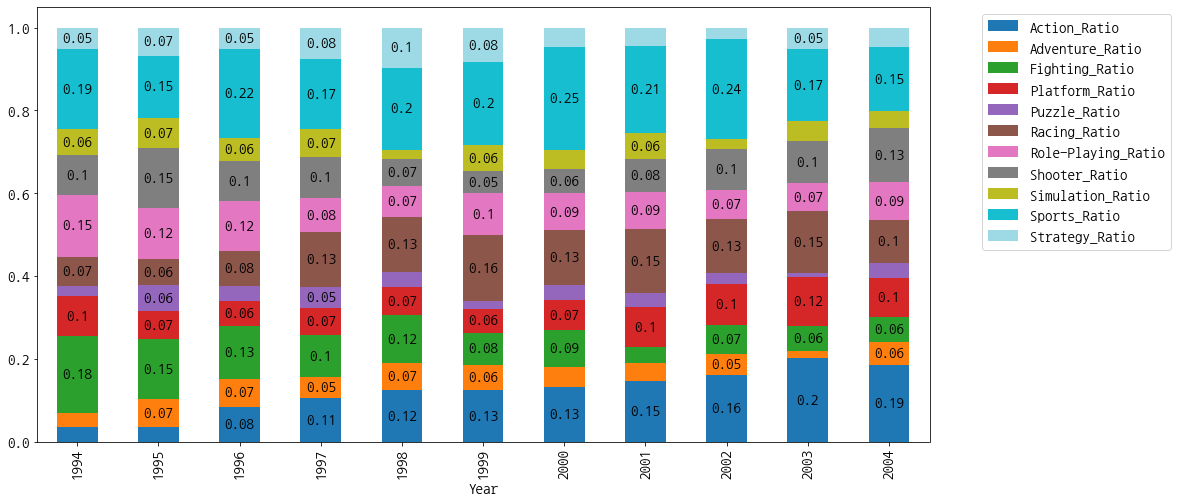

In [39]:
ratio_col = tmp.columns[-11:]
mpl.rcParams['font.size'] = 15
ax = tmp[ratio_col].plot.bar(stacked=True, cmap='tab20', figsize=(16, 8), legend=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = round(height, 2)

    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0.05: 
        ax.text(label_x, label_y, label_text, ha='center', va='center')

In [40]:
tmp = pd.crosstab(index=recent[part2]['Year'], columns=recent[part2]['Genre'])
tmp['Total'] = tmp.sum(axis=1)
for col in tmp.columns[:-1]:
    tmp[col+"_Ratio"] = tmp[col] / tmp['Total']

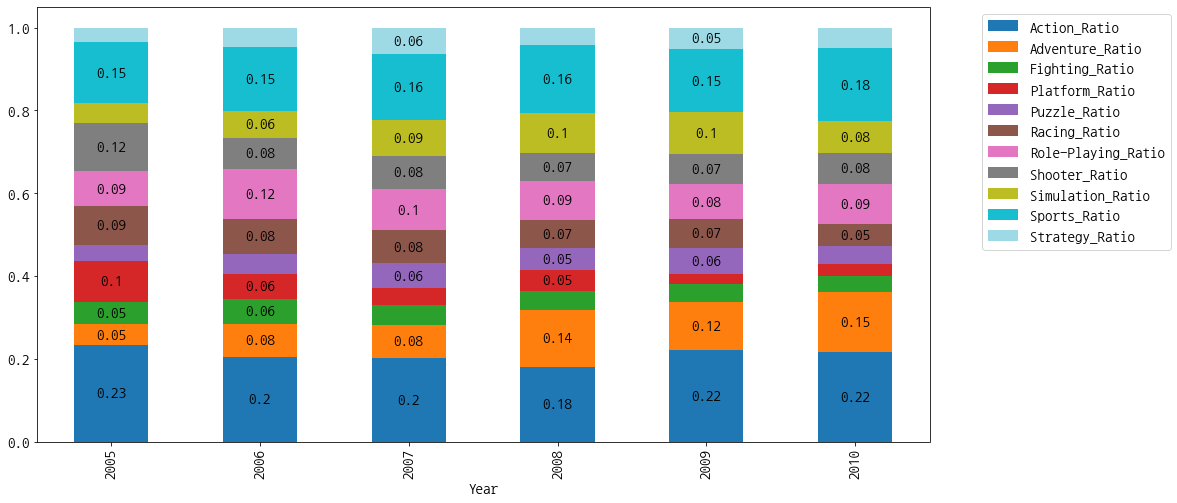

In [41]:
ratio_col = tmp.columns[-11:]
ax = tmp[ratio_col].plot.bar(stacked=True, cmap='tab20', figsize=(16, 8), legend=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0.05: 
        ax.text(label_x, label_y, label_text, ha='center', va='center')

In [42]:
tmp = pd.crosstab(index=recent[part3]['Year'], columns=recent[part3]['Genre'])
tmp['Total'] = tmp.sum(axis=1)
for col in tmp.columns[:-1]:
    tmp[col+"_Ratio"] = tmp[col] / tmp['Total']

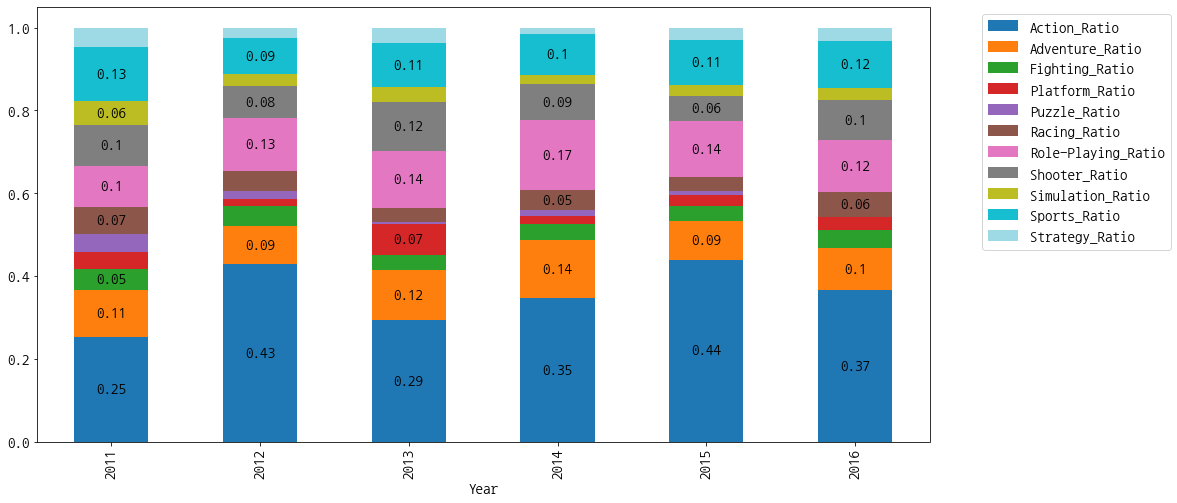

In [43]:
ratio_col = tmp.columns[-11:]

ax = tmp[ratio_col].plot.bar(stacked=True, cmap='tab20', figsize=(16, 8), legend=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0.05: 
        ax.text(label_x, label_y, label_text, ha='center', va='center')

미국, 유럽, 기타 지역은 선호 장르 변화가 비슷한 양상을 보인다.  
하지만 일본은 선호장르의 변화가 거의 없다고 할 수 있다.

# 시기별 게임 트렌드

### 1. 시기별 게임 출고량 지역 비중

In [44]:
data = pd.concat([past, recent])

In [45]:
year_sum = data.pivot_table(index=['Year'], aggfunc='sum').reset_index()
year_sum_melt = year_sum.iloc[:-2,:].melt(id_vars='Year', var_name='Region', value_name='Sales')

In [46]:
year_sum['Year_Total'] = year_sum[sales].sum(axis=1)
for reg in sales:
    year_sum[reg+"_Ratio"] = year_sum[reg] / year_sum['Year_Total']
year_sum.head()

,Year,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total_Sales,Year_Total,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
0,1980,640000,0,10130000,110000,0.0,10880000,0.931066,0.058824,0.000000,0.010110
1,1981,1960000,0,33400000,320000,0.0,35680000,0.936099,0.054933,0.000000,0.008969
2,1982,1650000,0,26920000,310000,0.0,28880000,0.932133,0.057133,0.000000,0.010734
3,1983,800000,8100000,7760000,140000,0.0,16800000,0.461905,0.047619,0.482143,0.008333
4,1984,2100000,14270000,33280000,700000,0.0,50350000,0.660973,0.041708,0.283416,0.013903


In [47]:
df_ratio = year_sum[['Year', 'NA_Sales_Ratio', 'EU_Sales_Ratio', 'JP_Sales_Ratio', 'Other_Sales_Ratio']].iloc[:-2,:].pivot_table(index='Year')

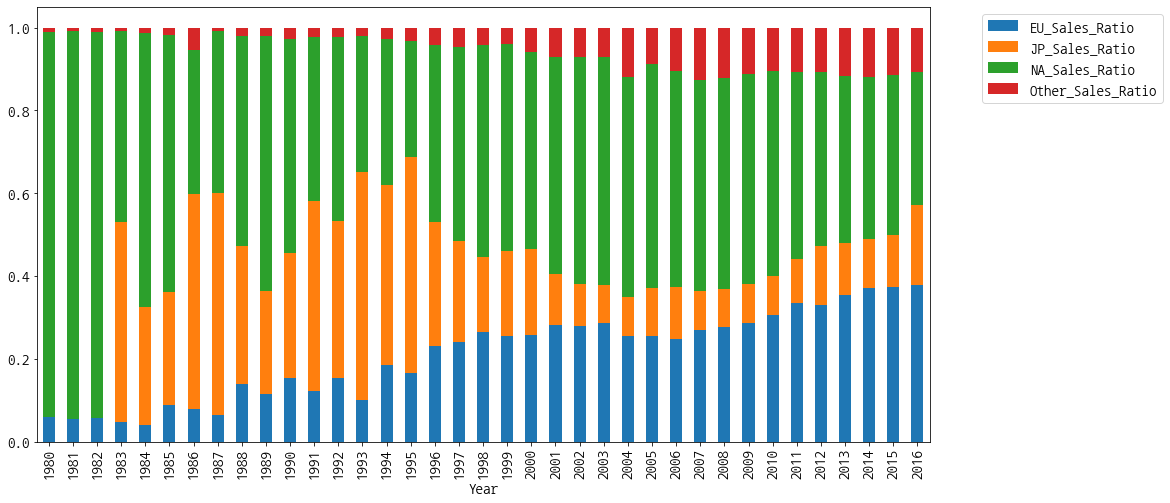

In [48]:
df_ratio.plot.bar(stacked=True, figsize=(16, 8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

90년대 일본비중이 높았으나 줄어들고 유럽비중 증가하고 있다.  
유럽이 미국도 추월하는 추세로 보인다.

### 2. 대세 플랫폼의 변화

In [49]:
# part1
paltform_part1_pivot = recent[part1].pivot_table(index=['Year', 'Platform'], values='Total_Sales', aggfunc='sum')

In [50]:
k = paltform_part1_pivot.reset_index()
result_part1 = pd.DataFrame()
for y in k.Year.unique():
    tmp = k[k['Year'] == y]
    total = k[k['Year'] == y]['Total_Sales'].sum()
    tmp.loc[:, 'Ratio'] = tmp.loc[:, 'Total_Sales'] / total
    result_part1 = result_part1.append(tmp)

/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [51]:
part1_platform_ratio = result_part1[['Year', 'Platform', 'Ratio']].pivot_table(index='Year', columns='Platform').fillna(0)

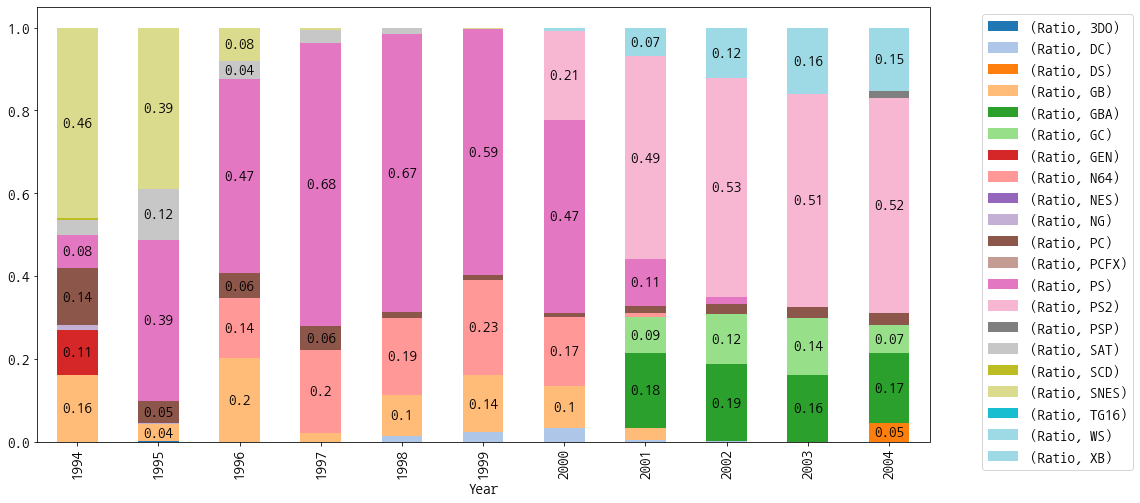

In [52]:
ax = part1_platform_ratio.plot.bar(stacked=True, figsize=(16, 8), cmap='tab20', legend=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0.04: 
        ax.text(label_x, label_y, label_text, ha='center', va='center')

In [59]:
part3_platform_ratio = result_part3[['Year', 'Platform', 'Ratio']].pivot_table(index='Year', columns='Platform').fillna(0)
#part3_platform_ratio.plot.bar(stacked=True, figsize=(16, 8))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [57]:
# part3
paltform_part3_pivot = recent[part3].pivot_table(index=['Year', 'Platform'], values='Total_Sales', aggfunc='sum')

In [58]:
k = paltform_part3_pivot.reset_index()
result_part3 = pd.DataFrame()
for y in k.Year.unique():
    tmp = k[k['Year'] == y]
    total = k[k['Year'] == y]['Total_Sales'].sum()
    tmp.loc[:, 'Ratio'] = tmp.loc[:, 'Total_Sales'] / total
    result_part3 = result_part3.append(tmp)

/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

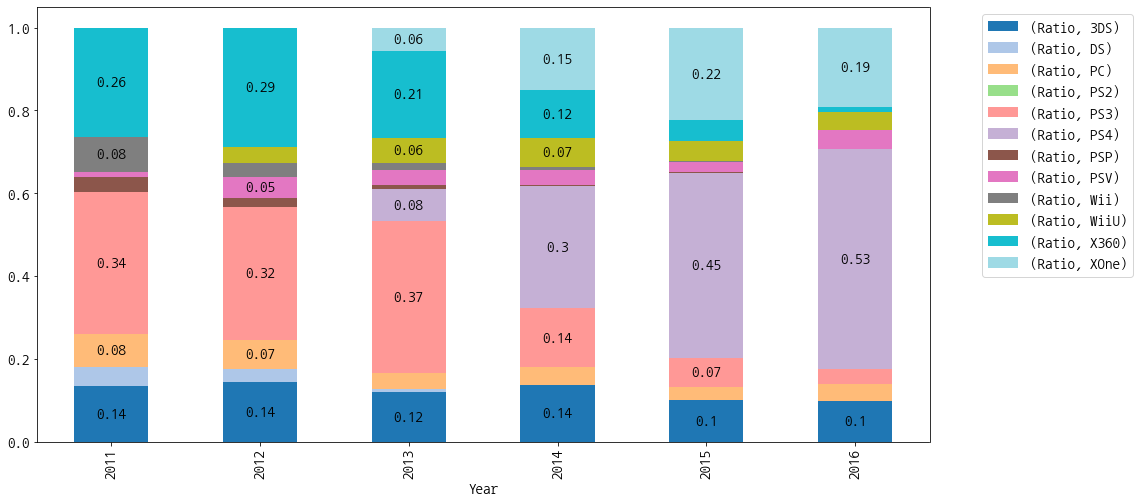

In [60]:
ax = part3_platform_ratio.plot.bar(stacked=True, figsize=(16, 8), cmap='tab20', legend=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0.05: 
        ax.text(label_x, label_y, label_text, ha='center', va='center')

In [53]:
# part2
paltform_part2_pivot = recent[part2].pivot_table(index=['Year', 'Platform'], values='Total_Sales', aggfunc='sum')

In [54]:
k = paltform_part2_pivot.reset_index()
result_part2 = pd.DataFrame()
for y in k.Year.unique():
    tmp = k[k['Year'] == y]
    total = k[k['Year'] == y]['Total_Sales'].sum()
    tmp.loc[:, 'Ratio'] = tmp.loc[:, 'Total_Sales'] / total
    result_part2 = result_part2.append(tmp)

/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/gnlenfn/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [55]:
part2_platform_ratio = result_part2[['Year', 'Platform', 'Ratio']].pivot_table(index='Year', columns='Platform').fillna(0)
#part2_platform_ratio.plot.bar(stacked=True, figsize=(16, 8), colormap='Accent_r')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

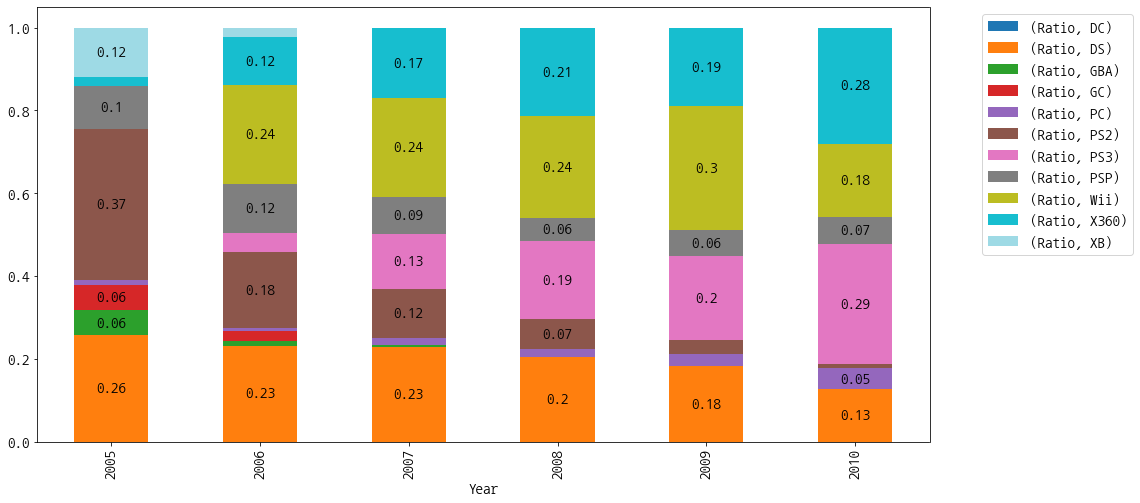

In [56]:
ax = part2_platform_ratio.plot.bar(stacked=True, figsize=(16, 8), cmap='tab20', legend=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0.05: 
        ax.text(label_x, label_y, label_text, ha='center', va='center')

PS -> PS2 -> PS3 & XBOX 360 -> PS4  콘솔 세대교체를 볼 수 있다.  
아무리 점유율이 높았더라도 새로운 콘솔 기기가 출시되면 대세는 옮겨가게 된다.  

2000년대 닌텐도 전성기로 플레이스테이션과 Xbox로 양분된 콘솔 시장에 새로운 축으로 부상했으나 그 이후 힘을 쓰지 못했다.  


In [61]:
recent[part1]['Genre'].value_counts()

Sports          870
Action          645
Racing          564
Shooter         422
Platform        389
Role-Playing    382
Fighting        356
Strategy        238
Adventure       216
Simulation      204
Puzzle          135
Name: Genre, dtype: int64

In [62]:
recent[part2]['Genre'].value_counts()

Action          1297
Sports           992
Adventure        655
Role-Playing     595
Simulation       503
Shooter          498
Racing           456
Puzzle           322
Strategy         303
Platform         299
Fighting         296
Name: Genre, dtype: int64

In [63]:
recent[part3]['Genre'].value_counts()

Action          1202
Role-Playing     448
Adventure        384
Sports           382
Shooter          310
Racing           174
Fighting         154
Simulation       125
Platform         119
Strategy         114
Puzzle            68
Name: Genre, dtype: int64

눈으로 볼땐 최근 액션장르가 두각을 드러낸다는 것만 뚜렷하다  
액션장르 top3 뽑자  
앞서서 지역별 차이 있었음(1번) --> 앞내용으로 넘겨
시기별/ 지역별로 나눔

# 가장 많이 팔린 게임 TOP5

In [64]:
recent[part1][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,NA_Sales
424,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000
4004,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430000
1551,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9000000
2969,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8410000
2006,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6990000


In [65]:
recent[part1][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,EU_Sales
424,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,8890000
4421,World of Warcraft,PC,2004,Role-Playing,Activision,6210000
1551,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,6180000
2969,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,5490000
2218,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,5090000


In [66]:
recent[part1][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,JP_Sales
424,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,10220000
1551,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,7200000
2477,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5380000
1688,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,4099999
1581,Final Fantasy VIII,PS,1999,Role-Playing,SquareSoft,3630000


In [67]:
recent[part1][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,Other_Sales
4004,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,10570000
4086,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,7530000
4718,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,Konami Digital Entertainment,1930000
2969,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,1780000
2006,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,1300000


In [68]:
recent[part2][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,NA_Sales
5883,Wii Sports,Wii,2006,Sports,Nintendo,41490000
8658,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000
10251,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000
9380,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000


In [69]:
recent[part2][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,EU_Sales
5883,Wii Sports,Wii,2006,Sports,Nintendo,29020000
8658,Mario Kart Wii,Wii,2008,Racing,Nintendo,12880000
10251,Wii Sports Resort,Wii,2009,Sports,Nintendo,11010000
5153,Nintendogs,DS,2005,Simulation,Nintendo,11000000
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,9230000


In [70]:
recent[part2][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,JP_Sales
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,6500000
6280,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6040000
5381,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5330000
5361,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,5320000
11449,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,4870000


In [71]:
recent[part2][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,Other_Sales
5883,Wii Sports,Wii,2006,Sports,Nintendo,8460000
8658,Mario Kart Wii,Wii,2008,Racing,Nintendo,3310000
10251,Wii Sports Resort,Wii,2009,Sports,Nintendo,2960000
7318,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,2930000
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,2900000


In [72]:
recent[part3][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales']].sort_values(by='Total_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,Total_Sales
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21389999
12930,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,14760000
15343,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14240000
13312,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,14040000
13338,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,13740000


In [73]:
recent[part3][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,NA_Sales
12930,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000
13338,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000
14103,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6720000
13576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6630000


In [74]:
recent[part3][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,EU_Sales
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,9270000
15111,FIFA 16,PS4,2015,Sports,Electronic Arts,6060000
13312,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,5880000
12967,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5820000
14503,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,5810000


In [75]:
recent[part3][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,JP_Sales
13485,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,4360000
13731,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,3440000
14562,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,3180000
13430,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,3140000
14296,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,3080000


In [76]:
recent[part3][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head()

,Name,Platform,Year,Genre,Publisher,Other_Sales
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,4139999
13312,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,2520000
15343,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,2310000
14503,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,2020000
13464,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,2009999


In [77]:
other5 = recent[part3].sort_values(by='Other_Sales', ascending=False).head()['Name'].to_list()
jp5 = recent[part3].sort_values(by='JP_Sales', ascending=False).head()['Name'].to_list()
eu5 = recent[part3].sort_values(by='EU_Sales', ascending=False).head()['Name'].to_list()
na5 = recent[part3].sort_values(by='NA_Sales', ascending=False).head()['Name'].to_list()

In [78]:
best = list(set(other5 + jp5 + eu5 + na5))
cond = recent[part3]['Name'].isin(best)
best_sell = recent[part3 & cond]

In [79]:
toptop = best_sell.pivot_table(index="Name", values='Total_Sales', aggfunc='sum').astype(int).sort_values(by='Total_Sales', ascending=False).reset_index()
toptop

,Name,Total_Sales
0,Grand Theft Auto V,46290007
1,Call of Duty: Modern Warfare 3,30840000
2,Call of Duty: Black Ops II,29730000
3,Call of Duty: Ghosts,27370000
4,Call of Duty: Black Ops 3,25299999
5,FIFA 16,16430000
6,FIFA Soccer 13,16149999
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11330000
8,Halo 4,9760000
9,Animal Crossing: New Leaf,9099999


In [80]:
data = best_sell.groupby("Name")['Total_Sales'].sum()

In [81]:
data

Name
Animal Crossing: New Leaf                     9099999
Call of Duty: Black Ops 3                    25299999
Call of Duty: Black Ops II                   29730000
Call of Duty: Ghosts                         27370000
Call of Duty: Modern Warfare 3               30840000
FIFA 16                                      16430000
FIFA Soccer 13                               16149999
Grand Theft Auto V                           46290007
Halo 4                                        9760000
Monster Hunter 4                              3440000
Pokemon Black 2/Pokemon White 2               8340000
Pokemon Omega Ruby/Pokemon Alpha Sapphire    11330000
Yokai Watch 2 Ganso/Honke                     3210000
Name: Total_Sales, dtype: int64

In [82]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

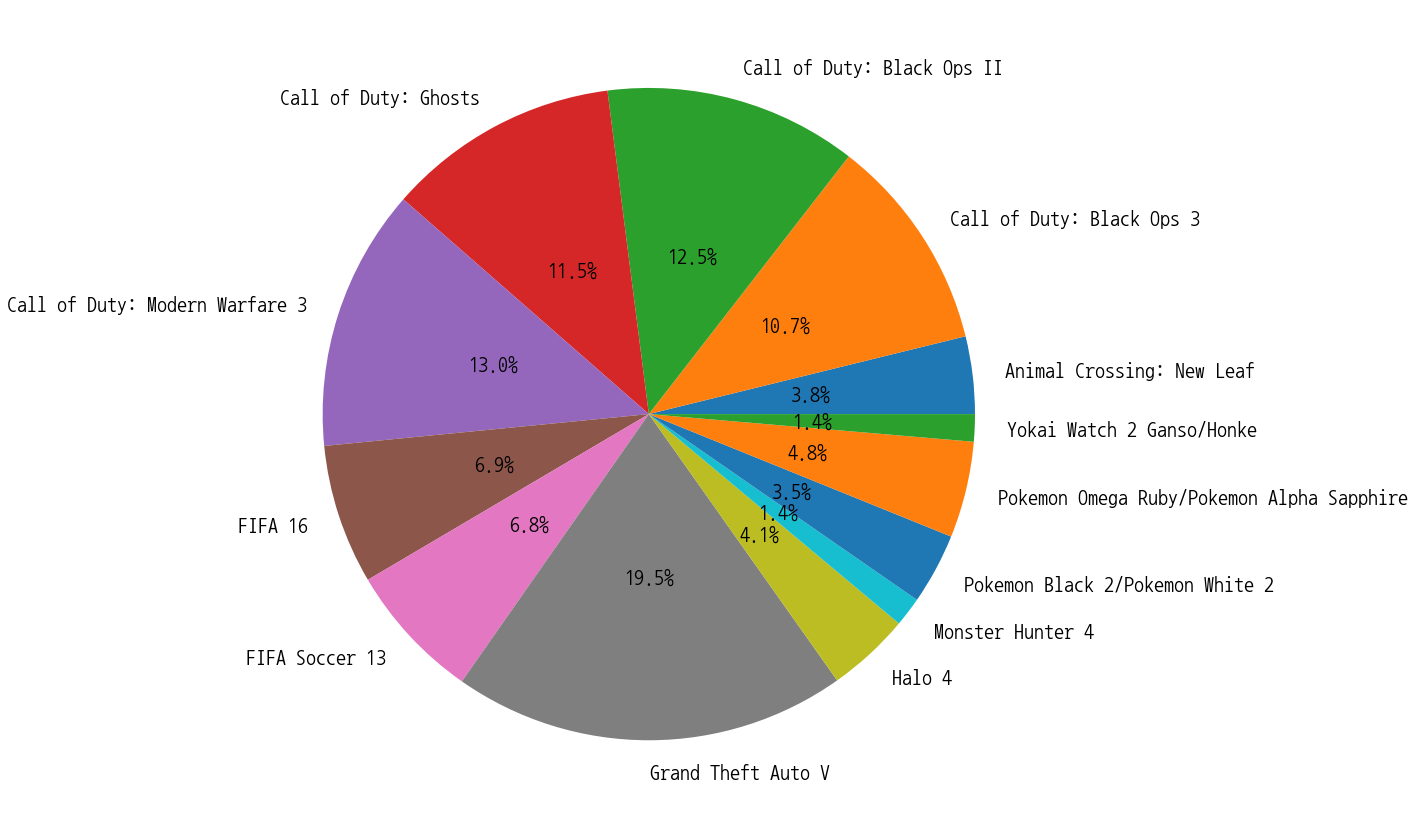

In [83]:
plt.figure(figsize=(15, 15))
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.show()

Text(0.5, 1.0, 'Grand Theft Auto V')

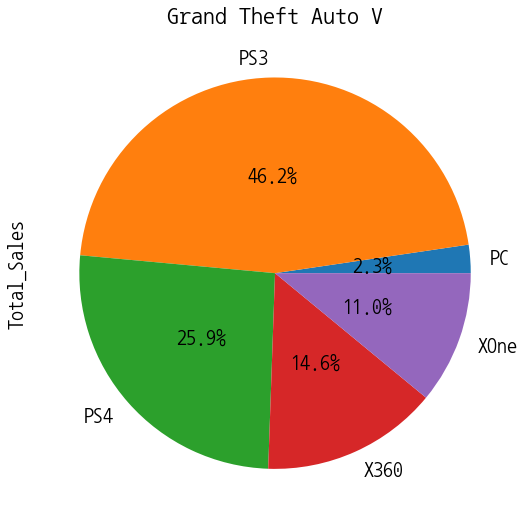

In [95]:
plt.figure(figsize=(9,9))
c = best_sell["Name"] == 'Grand Theft Auto V'
best_sell[c].groupby("Platform")['Total_Sales'].sum().plot.pie(autopct="%.1f%%", pctdistance=0.5)
plt.title("Grand Theft Auto V")

Text(0.5, 1.0, 'FIFA 2016')

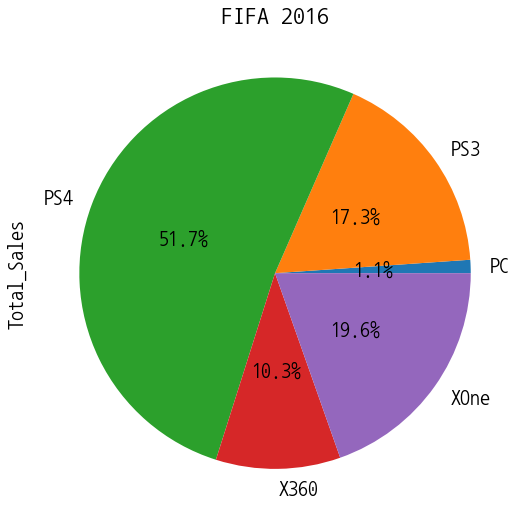

In [94]:
plt.figure(figsize=(9,9))
c = best_sell["Name"] == 'FIFA 16'
best_sell[c].groupby("Platform")['Total_Sales'].sum().plot.pie(autopct="%.1f%%", pctdistance=0.5)
plt.title("FIFA 2016")

ps4의 약진이 돋보이는 최근의 추세, 액션 슈팅이 대세(일본 제외)  
이와 일치하는 최근 가장 많이 출고된 게임들 --> PS4(3에서 넘어가는 중) 그리고 슈팅 액션 장르  
일본은 롤플레잉 원툴, 한우물좌  
미국은 Xbox 판매량 많은 것 같은데 (확인 필요) 마소 영향?  
같은 콘솔대세에서 Xbox와 PS 지역별로 차이 있는지?


결론 
- 장르: 슈팅
- 플랫폼: 새로운 콘솔기기 출시때 마다 다음 세대로 넘어가는 것이 합리적  
    2021년 현재 PS5와 Xbox Series X같은 9세대 콘솔 출시로 이전 세대는 결국 점유율 잃을것 --> 새 플랫폼에 대한 개발환경 적응 요구
- 닌텐도 독점작을 제외하면 PS, Xbox가 양분 but PS가 우세한 것으로 보임(최고 판매작 중)
- PS 독점작은 괜찮지만 Xbox 독점작은 안된다
- 북미와 유럽 공략 --> 일본시장은 전체적인 추세와는 다른 양상을 보이기때문에 효율성을 위해 우선순위 밀림
- Other region의 경우 북미, 유럽과 비슷한 추세를 보이기 때문에 매출이 따라올 것으로 예상
- 일본은 나홀로 닌텐도, 닌텐도 롤플레잉까지 고려하기보다는 다른 지역에 집중하는 것이 나을것으로 봄
- 일본의 전체 판매량 비중이 최근 높지 않기 때문

# 결론

### 플랫폼 선택

- 콘솔 게임 출고량이 대부분이므로 콘솔 게임 개발이 필요하다.
- 그 중에서도 플레이스테이션과 Xbox가 시장을 양분하고 있다.
- 데이터 상으로 가장 최근 기기인 PS4가 Xbox One을 압도하는 것으로 보인다.
- 하지만 콘솔 기기들은 새로운 기기가 출시되면 세대교체가 이루어진다.
- 2021년 현재 PS5와 Xbox Series X이 출시되어있는 만큼 새로운 플랫폼에 대한 개발환경 적응을 통해 장기적인 대응이 필요하다.
- 플레이스테이션을 선택해야한다.

### 장르와 집중 공략 지역

- 북미, 유럽, 일본, 기타 지역으로 나눴을 때, 일본을 제외한 세 지역은 선호 장르의 변화 등에서 유사한 경향을 보인다.
- 북미 지역은 전통적으로 판매 비중이 매우 높았고 최근까지도 판매량 점유율이 높았으나 유럽의 성장세가 크다.
- 일본의 경우, 판매량 점유율도 감소하는데 다른 장르를 선호하기 때문에 일본 시장 공략은 효율이 떨어진다.
- 최근 선호하는 장르도 일본을 제외하면 슈팅, 액션이지만 일본은 롤플레잉 장르 선호도가 전통적으로 강하다.
- 북미와 유럽시장에 집중하기 위해 슈팅게임을 선택한다.